In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class EpsilonGreedy:
    def __init__(self, k, eps, initial=0):
        self.k = k # number of arms
        self.eps = eps # epsilon parameter
        self.Q = np.zeros(k) + initial # action value estimates, initialized to the initial value
        self.N = np.zeros(k) # number of times each action is taken

    # choose an action based on epsilon
    def choose_action(self):
        if np.random.random() < self.eps:
            return np.random.randint(self.k) # choose a random action with probability epsilon
        else:
            return np.argmax(self.Q) # choose the action with highest estimated value with probability 1-epsilon

    # update action value estimate based on reward
    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]

In [3]:
# simulate bandit problem using the given algorithm
def simulate_bandit(algo, steps, k):
    optimal_action_counts = []
    rewards = []

    # play the game for the given number of steps
    for i in range(steps):
        action = algo.choose_action()
        reward = np.random.normal(Q[action], 1) # generate a reward for the chosen action
        algo.update(action, reward) # update action value estimate based on the received reward
        rewards.append(reward)

        optimal_action = np.argmax(Q) # get the index of the optimal action
        optimal_action_counts.append(action == optimal_action) # check if the chosen action is the optimal action

    return (np.array(optimal_action_counts), np.array(rewards))

# main program
k = 10 # number of arms
Q = np.random.normal(0, 1, k) # true action values, normally distributed

steps = 1000 # number of steps in each trial
trials = 2000 # number of trials to run for each epsilon value

epsilons = [0, 0.01, 0.1] # epsilon values to test

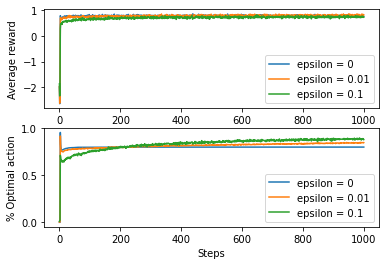

In [4]:
# plot the results for each epsilon value
for eps in epsilons:
    optimal_action_pct = np.zeros(steps)
    avg_rewards = np.zeros(steps)

    # run the trials and calculate average rewards and percentage of optimal actions taken over time
    for i in range(trials):
        algo = EpsilonGreedy(k, eps)
        optimal_action_counts, rewards = simulate_bandit(algo, steps, k)

        optimal_action_pct += optimal_action_counts / trials
        avg_rewards += rewards / trials

    # plot the results for the current epsilon value
    plt.subplot(2, 1, 1)
    plt.plot(avg_rewards, label=f"epsilon = {eps}")
    plt.xlabel("Steps")
    plt.ylabel("Average reward")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(optimal_action_pct, label=f"epsilon = {eps}")
    plt.xlabel("Steps")
    plt.ylabel("% Optimal action")
    plt.legend()

plt.show() # display the plots